<a href="https://colab.research.google.com/github/saloni1901/Data_science_projects/blob/master/Bigmart_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
df=pd.read_csv('train_bigmart_sales_reg.csv')#if put nrows=5 it will import only that much rows from your dataset
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [114]:
df.shape

(8523, 12)

Item_Identifier: Unique product ID

Item_Weight: Weight of product

Item_Fat_Content: Whether the product is low fat or not

Item_Visibility: The % of total display area of all products in a store allocated to the particular product

Item_Type: The category to which the product belongs

Item_MRP: Maximum Retail Price (list price) of the product

Outlet_Identifier: Unique store ID

Outlet_Establishment_Year: The year in which store was established

Outlet_Size: The size of the store in terms of ground area covered

Outlet_Location_Type: The type of city in which the store is located

Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

In [115]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [116]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [117]:
df.dtypes#7 categorical columns

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [118]:
cato=df.select_dtypes(include=np.object)
cato.head(4)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store


In [119]:
cato.apply(lambda x:len(x.unique()))
#how many unique values in these colomns

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                4
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

* total distinct items in stores are 1559
* 10 different stores
* outlet type is 16


In [120]:
#frequency of each product
for i in cato:
  print('colmun:%s'%i)
  print(cato[i].value_counts())


colmun:Item_Identifier
FDG33    10
FDW13    10
DRN47     9
NCJ30     9
FDX31     9
         ..
FDQ60     1
FDE52     1
FDN52     1
DRF48     1
FDK57     1
Name: Item_Identifier, Length: 1559, dtype: int64
colmun:Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
colmun:Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
colmun:Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT0

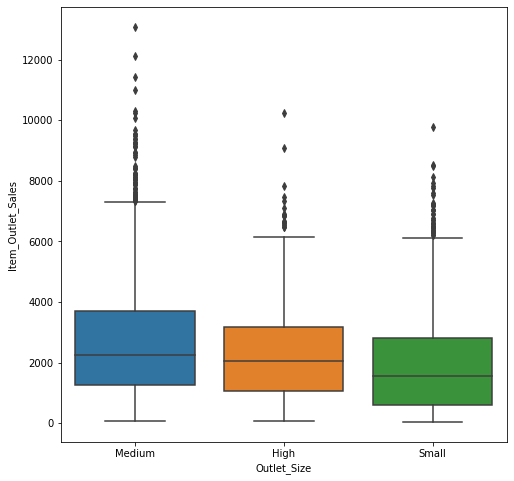

In [121]:
plt.figure(figsize=(8,8))
sns.boxplot(x=df['Outlet_Size'],y=df['Item_Outlet_Sales'])

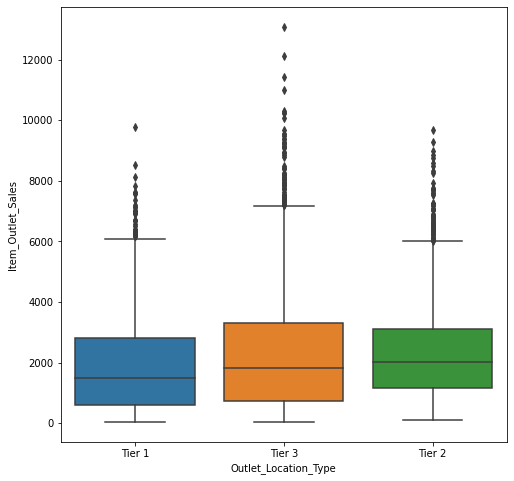

In [122]:
plt.figure(figsize=(8,8))
sns.boxplot(x=df['Outlet_Location_Type'],y=df['Item_Outlet_Sales'])

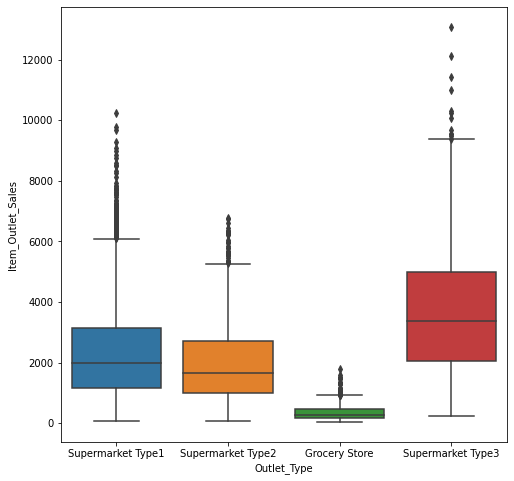

In [123]:
plt.figure(figsize=(8,8))
sns.boxplot(x=df['Outlet_Type'],y=df['Item_Outlet_Sales'])

In [124]:
df.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


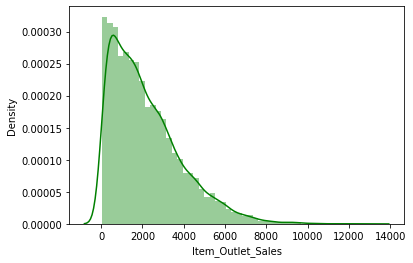

In [125]:
sns.distplot(df.Item_Outlet_Sales,color='g')

* Fairly Symmetrical	-0.5 to 0.5
* Moderate Skewed	-0.5 to -1.0 and 0.5 to 1.0
* Highly Skewed	< -1.0 and > 1.0

In [126]:
print('skewness:%f'%df['Item_Outlet_Sales'].skew())

skewness:1.177531


As you can observe from the above graph that our target column is not normally distributes
@ it has positive skewness


In [127]:
#filling missing values in numerical column item weight
df.fillna({'Item_Weight':df['Item_Weight'].mean()},inplace=True)


In [128]:
df.Item_Weight.isnull().sum()

0

In [129]:
#now fill categorical columns missing values(Outlet_size)#data['col'].fillna(data['col'].mode()[0])
df = df.fillna(df.mode().iloc[0])#we can use this for filling all row with mode

In [130]:
df.isnull().sum()# no missing values in dataset

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [131]:
df.Item_Visibility.min()#visibility cannot be 0 if that item is present in that store

0.0

In [132]:
mean=df.Item_Visibility.mean()
mean

0.06613202877895127

In [133]:
df.replace({'Item_Visibility':{0:mean}},inplace=True)

In [134]:
#applying
df['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

In [135]:
numerical=df.select_dtypes(include=np.float)
numerical

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.300,0.016047,249.8092,3735.1380
1,5.920,0.019278,48.2692,443.4228
2,17.500,0.016760,141.6180,2097.2700
3,19.200,0.066132,182.0950,732.3800
4,8.930,0.066132,53.8614,994.7052
...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834
8519,8.380,0.046982,108.1570,549.2850
8520,10.600,0.035186,85.1224,1193.1136
8521,7.210,0.145221,103.1332,1845.5976


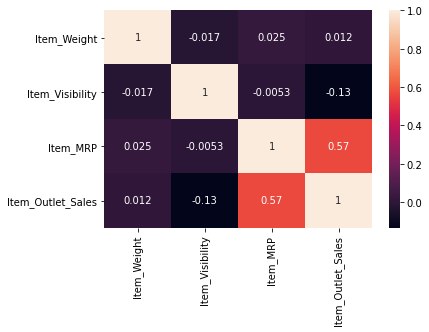

In [136]:
sns.heatmap(numerical.corr(),annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


1.2868767983596106


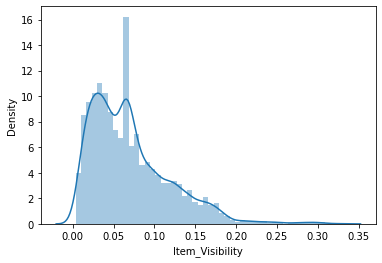

In [137]:
sns.distplot(numerical.Item_Visibility)
print(numerical.Item_Visibility.skew())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.09056145191764828


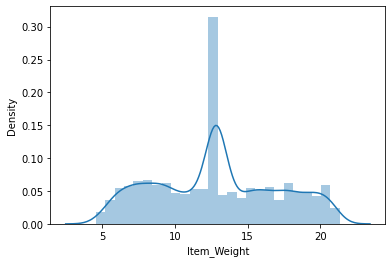

In [138]:
sns.distplot(numerical.Item_Weight)
print(numerical.Item_Weight.skew())

In [139]:
df['Item_Outlet_Sales']=np.sqrt(df['Item_Outlet_Sales'])#applied sqrt function to remove skweness


In [140]:
print(df.Item_Outlet_Sales.skew())#it reduced to 1.17 to 0.23

0.23467599347099247


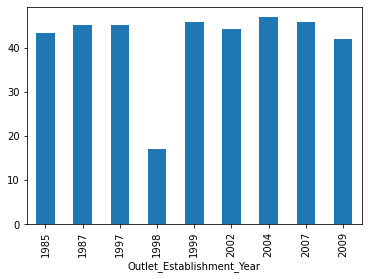

In [141]:
df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot.bar()

In [142]:
t=df.loc[df.Outlet_Establishment_Year==1998]

In [143]:
t['Outlet_Type'].value_counts()

Grocery Store    555
Name: Outlet_Type, dtype: int64

In [144]:
df['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True) 

In [148]:
from sklearn.preprocessing import LabelEncoder#label to ech item
l=LabelEncoder()
y=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for i in y:
    df[i]=l.fit_transform(df[i])

In [149]:
df.shape

(8523, 12)

In [151]:
#One Hot Coding to each label:
df = pd.get_dummies(df, columns=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type'])

In [152]:
df.shape

(8523, 44)

In [153]:
df.drop(["Item_Identifier"],axis=1, inplace =True)

In [155]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [163]:
X.shape

(8523, 42)

In [166]:
y.shape

(8523,)

In [156]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)

In [157]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [161]:
from sklearn.tree import DecisionTreeRegressor
t=DecisionTreeRegressor()
t.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [162]:
t.score(X_train,y_train)

1.0

In [168]:
from xgboost import XGBRegressor

In [169]:
p=XGBRegressor()
p.fit(X_train,y_train)

[14:39:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [172]:
y_p=p.predict(X_test)

In [171]:
p.score(X_train,y_train)

0.9999999972632385

In [174]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_p)

2.700442e-10